# Machinery Transport Planning

## Try me
 [![Open In Colab](../../_static/colabs_badge.png)](https://colab.research.google.com/github/ffraile/operations-research-notebooks/blob/main/docs/source/MIP/solved/Machinery%20Transport%20Planning%20(Solved).ipynb)[![Binder](../../_static/binder_badge.png)](https://mybinder.org/v2/gh/ffraile/operations-research-notebooks/main?labpath=docs%2Fsource%2FMIP%2Fsolved%2FMachinery%20Transport%20Planning%20(Solved).ipynb)

## Problem Definition
A firm must transport machines from production plants A, B and C to warehouses X, Y and Z. Five machines are required in X, four in Y and three in Z and there are eight machines available in A, five in B and three in C.
**a)** Contemplate and solve a Graph Theory model to determine the maximal flow of the machines that can be transported and the run of this flow.
**b)** By assuming a mean cost of €45 per transported machine, what would the total cost be of transporting the machines obtained in the former section?

## Requirements
Run the following script to install the packages used in the exercise:



In [ ]:
!pip install networkx
!pip install matplotlib


## Solution
We are going to use [networkx] (https://networkx.github.io/) to draw the network and find the maximal flow at a minimum cost between two nodes. We are going to create a graph to model the transport process, the network will comprise the Source node (node S), production plant nodes (nodes A, B, and C), warehouse nodes (nodes X, Y, and Z), and a sink node (node T). Edges are going to have two attributes: 

- $b_i$: maximum capacity (number of machines) of each production plant or warehouse
- $c_i$: cost, cost for the company to move one machine (€).

The flow of edges going from source node S to each production plant represent the available machines at each production plant. These edges have a capacity equal to machines available at each production plant, and a cost of 0;  
The flow of edges going from each production plant to each warehouse represents the machines transported by the company from each production plant to each warehouse. The edges will have a maximum capacity equal to the machines available at each production plan, and a cost of 45€. 
Finally, flow in edges from the warehouse nodes to the sink node represent the total number of machines in each ware house.  These edges will have a maximum capacity equal to the demand  of each warehouse, a company cost of 0. 



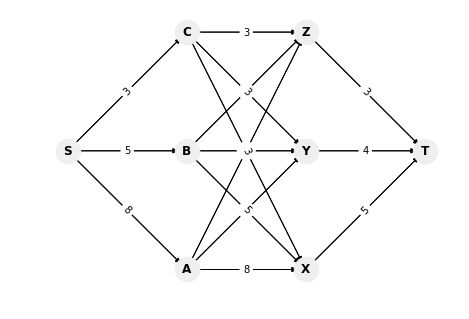

In [3]:
# Import the libraries that we are going to use, Network x to import the 

import networkx as nx
import matplotlib.pyplot as plt



# Create an empty directed graph structure: 
G = nx.DiGraph()

# Add edges and define two attributes, production and costs:
G.add_edges_from([("S", "A", {"capacity": 8, "cost": 0}),
    ("S", "B", {"capacity": 5, "cost": 0}),
    ("S", "C", {"capacity": 3, "cost": 0}),
    ("A", "X", {"capacity": 8, "cost": 45}),
    ("A", "Y", {"capacity": 8, "cost": 45}),
    ("A", "Z", {"capacity": 8, "cost": 45}),
    ("B", "X", {"capacity": 5, "cost": 45}),
    ("B", "Y", {"capacity": 5, "cost": 45}),
    ("B", "Z", {"capacity": 5, "cost": 45}),
    ("C", "X", {"capacity": 3, "cost": 45}),
    ("C", "Y", {"capacity": 3, "cost": 45}),
    ("C", "Z", {"capacity": 3, "cost": 45}),
    ("X", "T", {"capacity": 5, "cost": 0}),
    ("Y", "T", {"capacity": 4, "cost": 0}),
    ("Z", "T", {"capacity": 3, "cost": 0})])

# Draw the directed graph
pos = {"S": (0, 1),
       "A": (1, 0),
       "B": (1, 1),
       "C": (1, 2),
       "X": (2, 0),
       "Y": (2, 1),
       "Z": (2, 2),
       "T": (3, 1)   
      }

nx.draw(G, pos)
nx.draw_networkx_edges(G, pos, weight=2)
nx.draw_networkx_nodes(G, pos, node_size=600, node_color='#efefef')
nx.draw_networkx_labels(G, pos, font_weight='bold' )

cap = nx.get_edge_attributes(G, 'capacity')
nx.draw_networkx_edge_labels(G, pos, edge_labels=cap)
plt.show()


In [4]:
max_flow, flow= nx.maximum_flow(G, "S", "T", capacity='capacity')
costs = nx.get_edge_attributes(G, 'cost')
cost=0
print("maximum flow value:", max_flow)
for k,v in flow.items():
    for k2 in v.keys():
        cost+=v[k2]*costs[(k,k2)]
        print("flow from ", k, " to ", k2, ": ", v[k2], "; Cost: ", v[k2]*costs[(k,k2)], "total cost: ", cost)

print ("Total cost is: ", cost)

maximum flow value: 12
flow from  S  to  A :  4 ; Cost:  0 total cost:  0
flow from  S  to  B :  5 ; Cost:  0 total cost:  0
flow from  S  to  C :  3 ; Cost:  0 total cost:  0
flow from  A  to  X :  0 ; Cost:  0 total cost:  0
flow from  A  to  Y :  1 ; Cost:  45 total cost:  45
flow from  A  to  Z :  3 ; Cost:  135 total cost:  180
flow from  B  to  X :  2 ; Cost:  90 total cost:  270
flow from  B  to  Y :  3 ; Cost:  135 total cost:  405
flow from  B  to  Z :  0 ; Cost:  0 total cost:  405
flow from  C  to  X :  3 ; Cost:  135 total cost:  540
flow from  C  to  Y :  0 ; Cost:  0 total cost:  540
flow from  C  to  Z :  0 ; Cost:  0 total cost:  540
flow from  X  to  T :  5 ; Cost:  0 total cost:  540
flow from  Y  to  T :  4 ; Cost:  0 total cost:  540
flow from  Z  to  T :  3 ; Cost:  0 total cost:  540
Total cost is:  540


In [ ]:
import pandas as pd
from IPython.display import display, Markdown

flow_df = pd.DataFrame.from_dict(flow, orient='index')
display(flow_df)

In [ ]:
optimal_flow = {}
for k,v in flow.items():
    for k2 in v.keys():
        optimal_flow[k,k2] = flow[k][k2]

nx.draw(G, pos)
nx.draw_networkx_edges(G, pos, weight=2)
nx.draw_networkx_nodes(G, pos, node_size=600, node_color='#efefef')
nx.draw_networkx_labels(G, pos, font_weight='bold' )
nx.draw_networkx_edge_labels(G, pos, edge_labels=optimal_flow)
